# Plotting and Visualization

Many problems encountered in EE involve processing large amounts of data.  One of the first steps here would be to visualize this data to understand what it looks like and what can be done with it.

In [2]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
# Add Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n
# plt.plot(t, y, t, yn)

In [3]:
# Get errorbars from noise 
# plt.plot(t, y, t, yn)
# plt.errorbar(t[::5], yn[::5], np.std(n), fmt='ro')

# Least Squares Curve Fitting

Assume we know something about the function that underlies the observed data (for example, that it is linear or a polynomial function).  However, we don't know the coefficients of the various terms.  For example, say our function takes two parameters $p_1$ and $p_2$, and is a linear function of the time variable $t$: $g(t, p_1, p_2) = p_1 t + p_2$.  

We have a number of *observations* $g_1, g_2, \ldots, g_n$ of this function at different time instants $t_1, t_2, \ldots, t_n$.  These observations can then be written as:

$$
\mathbf{g} \equiv
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_n
\end{pmatrix}
=
\begin{pmatrix}
t_1 & 1 \\
t_2 & 1 \\
\vdots & \vdots \\
t_n & 1
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2
\end{pmatrix}
\equiv
\mathbf{M}\mathbf{p}
$$

## Mean Square Error
We can therefore define an error $\varepsilon = \mathbf{Mp}-\mathbf{g}$ (note that this is itself a vector of point-wise errors), and a *mean-square error* or MSE as:

$$
E = \varepsilon^T \varepsilon = \sum_{1}^{N} \varepsilon_i = \sum_1^N ((p_1 t_i + p_2) - g_i)^2
$$

The goal of *least squares fitting* is to find the parameters $p_i$ such that this MSE $E$ is minimized.  More details of how this works can be seen at [LibreTexts](https://math.libretexts.org/Bookshelves/Linear_Algebra/Interactive_Linear_Algebra_(Margalit_and_Rabinoff)/06%3A_Orthogonality/6.5%3A_The_Method_of_Least_Squares).

In our case, we can use the `lstsq` function from the `numpy.linalg` library.  For this, we have to construct the $\mathbf{M}$ matrix.

In [4]:
# Use column_stack to put the vectors side by side
M = np.column_stack([t, np.ones(len(t))])
# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")

The estimated equation is 3.021910962200941 t + 1.0864406874451054


In [5]:
# Plot against the original input and compare
yest = stline(t, p1, p2)
# plt.plot(t, y, t, yn, t, yest)

# Non-linear curve fitting

What if your equation was not a linear function of the parameters?  For example:
$$g(t; p_1, p_2) = e^{-p_1 t} + p_2$$

The problem here is that we cannot create the $M$ matrix as a linear combination of $p_1$ and $p_2$!  We still have a notion of MSE:

$$E = \sum_1^N (g(t; p_1, p_2) - z_t)^2$$
where $z_t$ are the observed values.  However, the least squares minimization techniques discussed earlier do not work.  

## `curve_fit`

The `scipy.optimize` library contains the `curve_fit` function that can perform a non-linear curve fitting on observed data.  Unlike the least squares method, here we need to feed in a parametrized function that can be used to estimate the parameters.  

In [6]:
# Create a function with nonlinear dependence on parameters
def nlfunc(t, p1, p2):
    return np.exp(-p1 * t) + p2
z = nlfunc(t, 0.5, 0.5)
# Reuse the same noise - we are lazy
zn = z + 0.2*n
# plt.plot(t, z, t, zn)
# plt.errorbar(t[::5], zn[::5], np.std(n), fmt='ro')

In [7]:
# Set up the non-linear curve fit
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit(nlfunc, t, zn)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")

Estimated function: exp(-0.5329856644413471t) + 0.5111153036568549


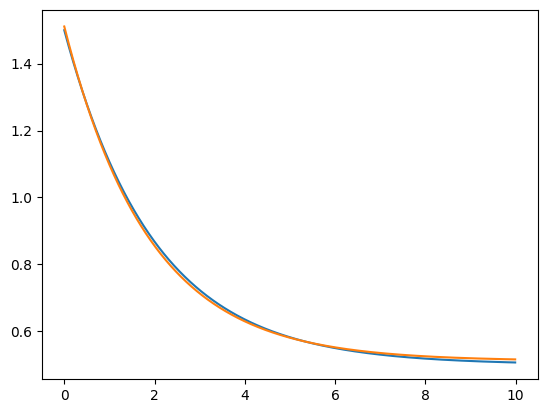

In [8]:
zest = nlfunc(t, zp1, zp2)
plt.plot(t, z, t, zest)

Estimated: 4.922045500716831 * sin(2*pi*0.4996470294791292*t)


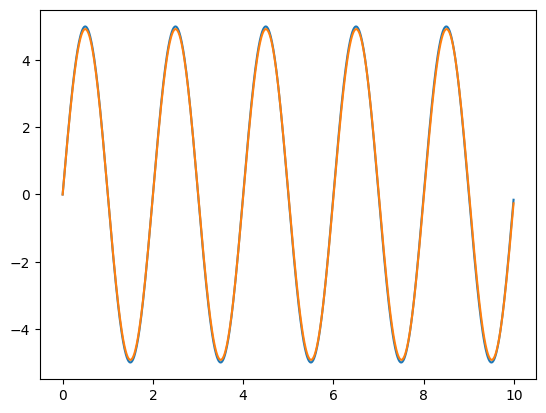

In [9]:
# Non-linear sinusoidal function
def sinfunc(t, p1, p2):
    return p1 * np.sin(2 * np.pi * p2 * t)
s = sinfunc(t, 5, 0.5)
sn = s + 0.2*n
# Fit with only first K points
K = 100
(sp1, sp2), _ = curve_fit(sinfunc, t[:K], sn[:K])
print(f"Estimated: {sp1} * sin(2*pi*{sp2}*t)")
# Regenerate data
sest = sinfunc(t, sp1, sp2)
plt.plot(t, s, t, sest)

# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

## Dataset 1(Straight Line)
### 1) Using lstsq

2.791124245414918 3.848800101430742
31.1 µs ± 5.57 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


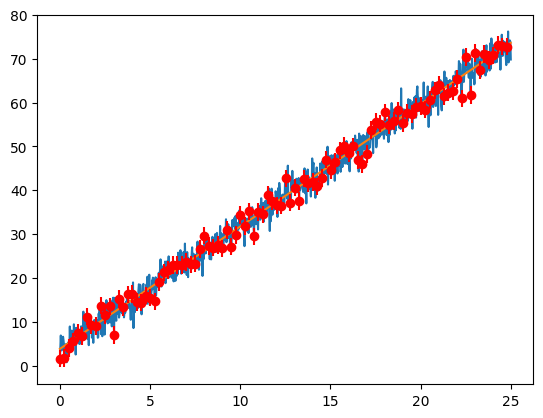

In [10]:
data = open('dataset1.txt')
t = []
g = []
error = []
for line in data:
    line = line.strip()
    line = line.split()
    t.append(line[0])
    g.append(line[1])
t = np.array(t,dtype = float)
g = np.array(g, dtype = float)
stack = np.column_stack([t , np.ones(len(t))])
(m, c),_,_,_ = np.linalg.lstsq(stack, g, rcond= None)
est = stline(t,m,c)
plt.plot(t,g,t,est)
print(m,c)
plt.errorbar(t[::10],g[::10],np.std(g-est), fmt = 'ro')
%timeit np.linalg.lstsq(stack,g,rcond =None)

### 2) Using curve_fit 

234 µs ± 6.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.791124245414918 3.848800101430742


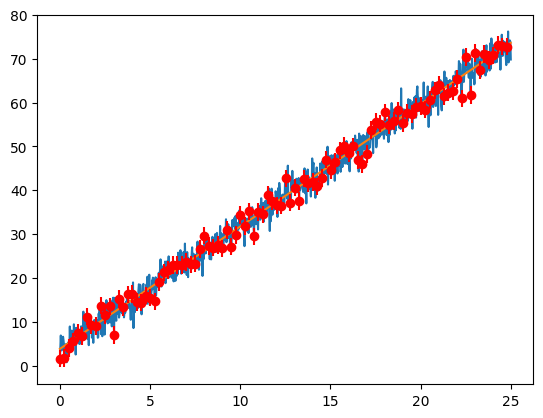

In [11]:
(m_1, c_1), hm = curve_fit(stline,t,g)
est_1 = stline(t,m_1,c_1)
plt.plot(t,g,t,est_1)
plt.errorbar(t[::10],g[::10],np.std(g-est_1), fmt = 'ro')
%timeit curve_fit(stline,t,g) 
print(m,c)

Here we are given data that corresponds to a straight line but contains noise. I have used two approaches, that are using the functions lstsq() and curve_fit(). First I have used an earlier defined function, stline that takes in the parameters x, m(slope) and c(y-intercept) and returns the value **y = mx + c** . Using stline() and curve_fit() we generate values of m and c such that the straight line generated using these parameters is the best fit line. We can see that both functions give the same value of m and c, but curve_fit() is much slower than lstsq(). So lstsq() will be preferred function for a straight line. 
<br>
We then plot the errorbars. Here I have used the size of errorbar as standard deviation of the error in actual data and corresponding point on the graph for a given 'x'.

## Dataset 2(Fourier Series)



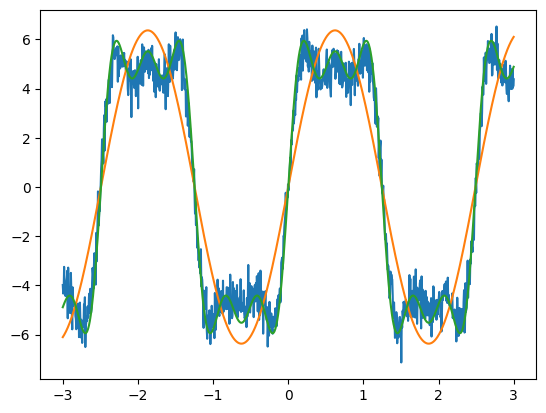

In [28]:
import math
def sinc(x,n,w):
    add=0
    for i in range(int(n)):
        add += (20/math.pi)*np.sin((2*i+1)*w*x)/(2*i+1)
    return add
data_2 = open('dataset2.txt')
t_2= []
g_2= []
error = []
for line in data_2:
    line = line.strip()
    line = line.split()
    t_2.append(line[0])
    g_2.append(line[1])
t_2 = np.array(t_2,dtype = float)
g_2 = np.array(g_2, dtype = float)
(n_1,w_1), ext = curve_fit(sinc,t_2,g_2)
square = sinc(t_2,int(n_1),w_1)
predict = sinc(t_2,3,w_1)
plt.plot(t_2,g_2,t_2,square,t_2,predict)
plt.errorbar(t_2[::10],g_2[::10],np.std(g_2-predict), fmt = 'ro')

<ErrorbarContainer object of 3 artists>

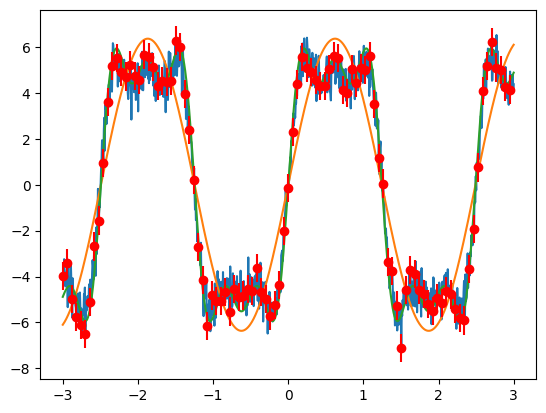

In [27]:
plt.plot(t_2,g_2,t_2,square,t_2,predict)
plt.errorbar(t_2[::10],g_2[::10],np.std(g_2-predict), fmt = 'ro')

This data corresponds to a sum of several sine waves that are harmonics of some fundamental frequency. Here I have defined a function called sinc that is the sum of odd harmonics a certain frequency, because that gives a plot very similar to the data we have here. It takes parameters x, n (number of harmonics) and w(angular frequency) as inputs. Here we have one more unknown parameter that is Amplitude, but I have estimated it by looking at the data. This is because passing too any variables through curve_fit() distorts the predicted curve.
<br>
After passing the curve through curev_fit() the predicted curve(in orange) is not a good fit. But we get a pretty good estimate of frequency. After this I varied n till I got a pretty good fit. We can see that this cuve(in green) is better fit.Here non linear curve fitting is the only appropriate method.
<br>
For errorbars I have used the same approach as previous dataset.

## Dataset 3(Planck's Constant)

6.643229758680164e-34 6011.36152155458


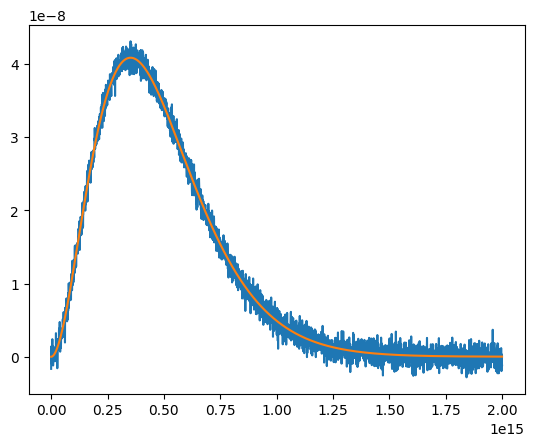

In [23]:
def plancks_eqn(x,h,T):
    c = 300000000.0
    k = 1.38e-23
    energy = ((2*h*x*x*x)/(c*c))*(1/(np.exp((h*x)/(k*T))-1))
    return energy
planck = open('dataset3.txt')
freq =[]
energy = []
initial_guess=[10e-34,1000]
for line in planck:
    line = line.strip()
    line = line.split()
    freq.append(line[0])
    energy.append(line[1])
freq = np.array(freq, dtype = float)
energy =np.array(energy, dtype=float)
(h,Temp),hmm = curve_fit(plancks_eqn,freq,energy,initial_guess)
estim = plancks_eqn(freq,h,Temp)
plt.plot(freq,energy,freq,estim)
print(h,Temp)

<ErrorbarContainer object of 3 artists>

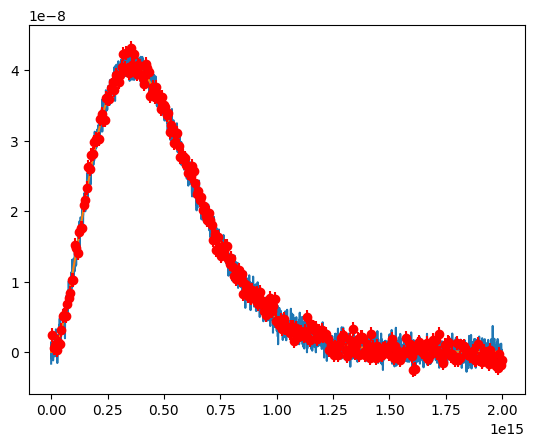

In [31]:
plt.plot(freq,energy,freq,estim)
plt.errorbar(freq[::10],energy[::10],np.std(energy-estim), fmt = 'ro')

The data here corresponds to an observation of Blackbody radiation and follows Planck's law. Here we define a function called plancks_eqn, that takes x(frequency) , h(Planck's constant) and T(temperature) as inputs and outputs the density of electromagnetic radiation at that temperature. 
<br>
If we initially try to pass the data through curve_fit, we will get an overflow error.  This is because the parameters we are dealing with have a great difference in their orders. Hence we have given initial estimates to h and T. We know h is in order of 1e-34. We can use a few points given in the dataset and find that the temperature is of order 1e3 degrees. Using these initial inputs we get a pretty good estimate of h.

## Dataset 4

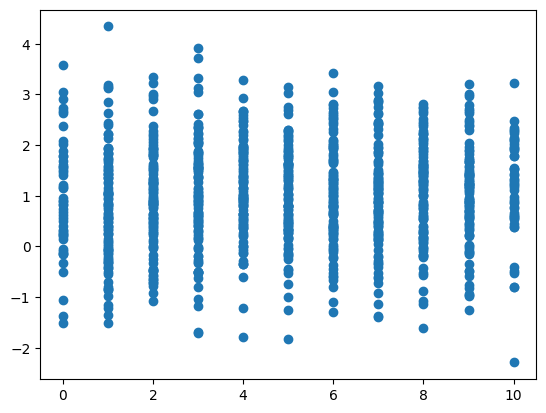

In [4]:
unknown = open('dataset4.txt')
y = []
x = []
for line in unknown:
    line = line.strip()
    line = line.split()
    x.append(line[0])
    y.append(line[1])
x = np.array(x,dtype=float)
y = np.array(y,dtype=float)
plt.scatter(x,y)
mean=[]
add=y[0]
count=1
x_n=[]  #Number of datapoints
for i in range(1,len(x)):
    if(int(x[i])==int(x[i-1])):
        add+=y[i]
        count+=1
    if(x[i]!=x[i-1] or i==(len(x)-1)):
        mean.append(add/count)
        add=y[i]
        count=1
        x_n.append(x[i-1])
x_n=np.array(x_n)
mean=np.array(mean) 

           10             9         8          7         6         5
1.222e-05 x  - 0.0006086 x + 0.013 x - 0.1554 x + 1.141 x - 5.299 x
          4         3         2
 + 15.44 x - 26.99 x + 25.46 x - 9.808 x + 0.9622


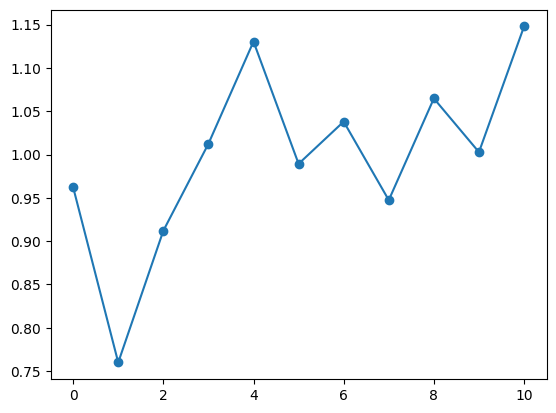

In [7]:
plt.plot(x_n,mean)
plt.scatter(x_n,mean)
t = np.polyfit(x_n,mean,len(x_n)-1)
fin = np.poly1d(t)
print(fin)

Here we are given data with no idea about the function used to generate it. If we plot a scatter plot we see that it has multiple outputs for a given output. Hence I have taken the mean of all outputs corresponding to a same input, annd then I have made a plot correspondin to them. I have also used np.polyfit() and np.poly1d() to generate a polynomial passing through the filtered data. 